Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


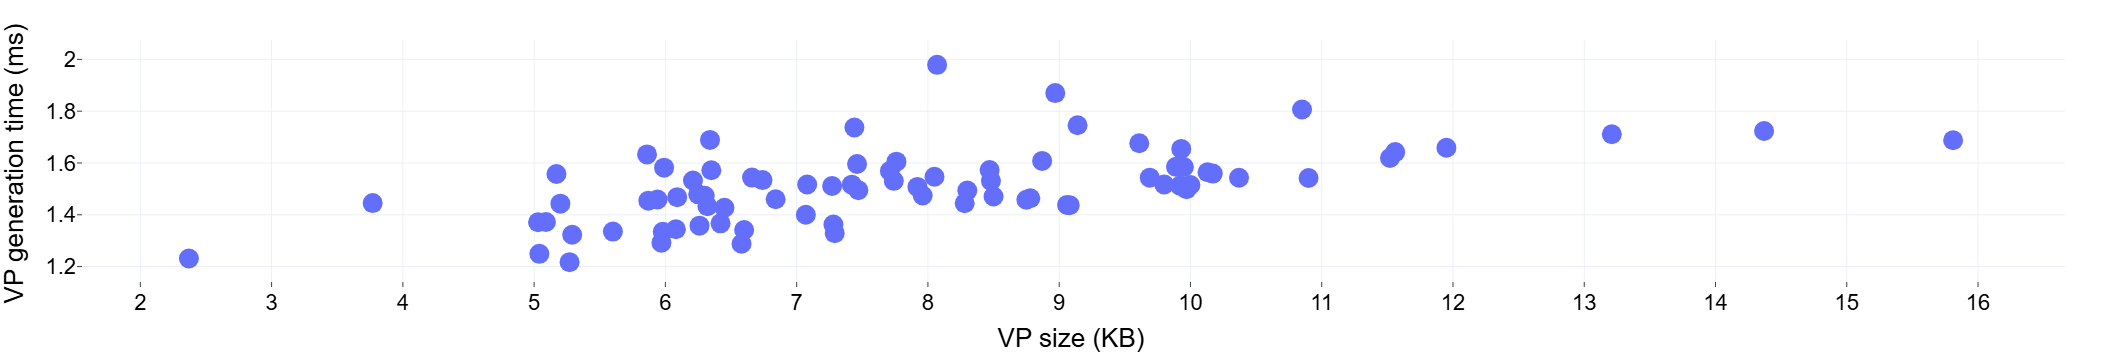

Average Time VP generation: 1.51 ms


In [87]:
%pip install pandas
%pip install plotly
import pandas as pd
import plotly.express as px
from scipy.stats import zscore

df = pd.read_csv("../perf2/ZK/P2-DPKI-Local.csv")

#--------------------------Clean from outliers--------------------------
z_scores = zscore(df['genVPTime'])
threshold = 2
cleanedDF = df[(z_scores < threshold)]
cleanedDF = cleanedDF.groupby('sizeVP', as_index=False).mean()

#Plot VP generation time depending on the VP size
fig = px.scatter(cleanedDF, x=cleanedDF.columns[0], y=cleanedDF.columns[1])
fig.update_layout(
     xaxis_title="VP size (KB)",
     yaxis_title="VP generation time (ms)",
     xaxis=dict(tickmode='linear', tick0=1, dtick=1,ticks="inside"),
     yaxis=dict(ticks="inside"),
     font=dict(family="Arial", size=12, color="black")
)
fig.update_traces(marker_size=20)
fig.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=16,
    margin=dict(l=40, r=40, t=40, b=40),
    template="plotly_white" # Clean background
)
fig.show()
fig.write_image("gen_time.png", width=1000, height=600, scale=3)


#--------------------------Average on data with outliers (NO CLEANED DATAFRAME)--------------------------
meanVPgenTime = cleanedDF.iloc[:, 1].mean()
print(f"Average Time VP generation: {meanVPgenTime:.2f} ms")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Flag           960 non-null    object 
 1   CommName       940 non-null    object 
 2   VerVPTime      940 non-null    float64
 3   VerVPRes       940 non-null    object 
 4   VerCRTTime     870 non-null    float64
 5   VerCRTRes      940 non-null    object 
 6   verRASignTime  870 non-null    float64
 7   VerCTTime      870 non-null    float64
 8   nIntCA         870 non-null    float64
 9   sizeCRT        870 non-null    float64
 10  sizeCRTIntCA   870 non-null    float64
 11  sizeVP         940 non-null    float64
dtypes: float64(8), object(4)
memory usage: 92.0+ KB
None
                              VerVPTime  VerCRTTime  verRASignTime  VerCTTime  \
CommName                                                                        
economist.com                 14.613333   23.461111       2

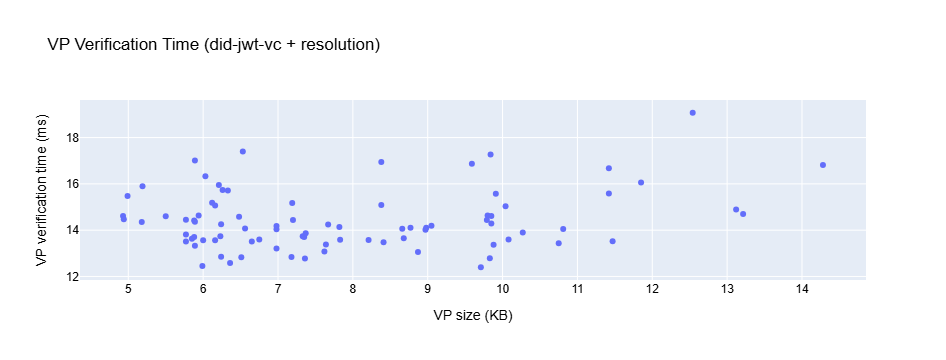

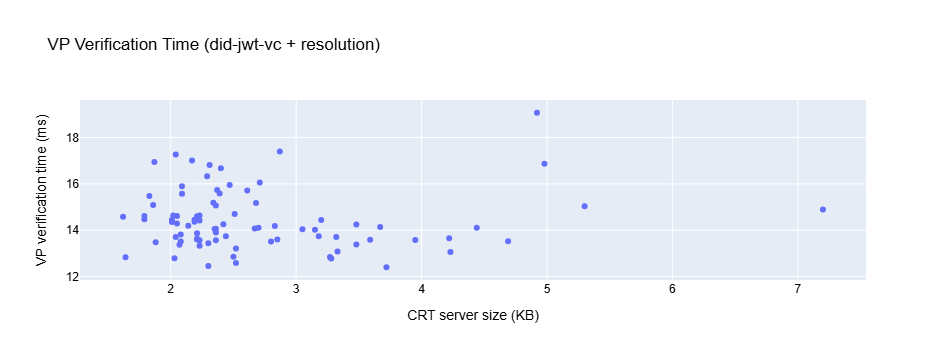

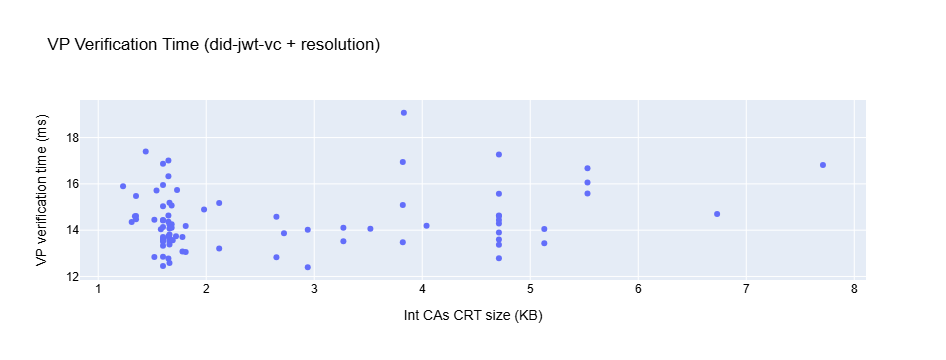

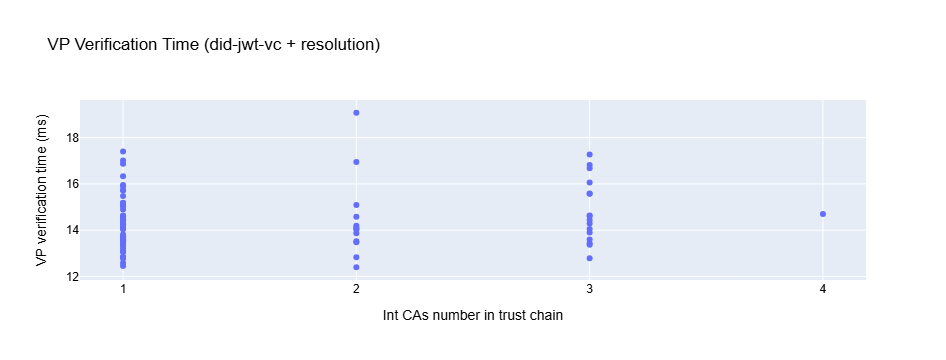

Average Time VP check: 14.42 ms
Average VP size: 7.91 KB


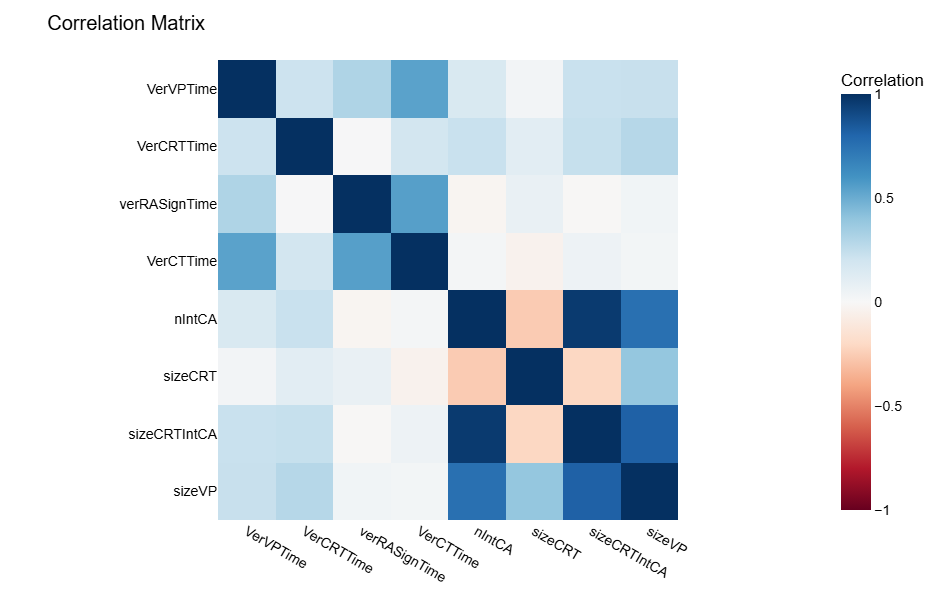

               VerVPTime  VerCRTTime  verRASignTime  VerCTTime    nIntCA  \
VerVPTime       1.000000    0.213130       0.307906   0.541247  0.158588   
VerCRTTime      0.213130    1.000000       0.007119   0.190961  0.224364   
verRASignTime   0.307906    0.007119       1.000000   0.552914 -0.024768   
VerCTTime       0.541247    0.190961       0.552914   1.000000  0.021154   
nIntCA          0.158588    0.224364      -0.024768   0.021154  1.000000   
sizeCRT         0.027955    0.110186       0.074962  -0.039804 -0.258523   
sizeCRTIntCA    0.225871    0.233753      -0.008738   0.054537  0.963660   
sizeVP          0.228909    0.285364       0.035233   0.027540  0.755267   

                sizeCRT  sizeCRTIntCA    sizeVP  
VerVPTime      0.027955      0.225871  0.228909  
VerCRTTime     0.110186      0.233753  0.285364  
verRASignTime  0.074962     -0.008738  0.035233  
VerCTTime     -0.039804      0.054537  0.027540  
nIntCA        -0.258523      0.963660  0.755267  
sizeCRT        

In [5]:
df = pd.read_csv("../perf/P3-DPKI.csv")

print(df.info())
df = df.dropna()

#Only OK responses and numerical columns
df = df[df['Flag'] == 'OK']
df = df.drop(columns=['Flag', 'VerVPRes', 'VerCRTRes'])

#--------------------------Clean from outliers--------------------------
z_scores = zscore(df['VerVPTime'])
threshold = 4.5
cleanedDF = df[(z_scores < threshold)]

cleanedDF = cleanedDF.groupby('CommName').mean()

dfSizeVP = cleanedDF.sort_values(by='sizeVP')
dfSizeCRT = cleanedDF.sort_values(by='sizeCRT')
dfSizeCRTIntCA = cleanedDF.sort_values(by='sizeCRTIntCA')
dfnIntCA = cleanedDF.sort_values(by='nIntCA')
print(dfSizeVP)


template = "plotly"
scatter_color = "#636EFA"

# Plot VP verification time depending on the VP size
fig10 = px.scatter(dfSizeVP, x=dfSizeVP.columns[7], y=dfSizeVP.columns[0], title='VP Verification Time (did-jwt-vc + resolution)', template=template)
fig10.update_traces(marker_color=scatter_color)
fig10.update_layout(
    xaxis_title="VP size (KB)",
    yaxis_title="VP verification time (ms)",
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig10.show()

# Plot VP verification time depending on the server certificate size
fig11 = px.scatter(dfSizeCRT, x=dfSizeCRT.columns[5], y=dfSizeCRT.columns[0], title='VP Verification Time (did-jwt-vc + resolution)', template=template)
fig11.update_traces(marker_color=scatter_color)
fig11.update_layout(
    xaxis_title="CRT server size (KB)",
    yaxis_title="VP verification time (ms)",
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig11.show()

# Plot VP verification time depending on the intermediate CAs certificate size 
fig12 = px.scatter(dfSizeCRTIntCA, x=dfSizeCRTIntCA.columns[6], y=dfSizeCRTIntCA.columns[0], title='VP Verification Time (did-jwt-vc + resolution)', template=template)
fig12.update_traces(marker_color=scatter_color)
fig12.update_layout(
    xaxis_title="Int CAs CRT size (KB)",
    yaxis_title="VP verification time (ms)",
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig12.show()

# Plot VP verification time depending on the number of intermediate CAs in the trust chain
fig13 = px.scatter(dfnIntCA, x=dfnIntCA.columns[4], y=dfnIntCA.columns[0], title='VP Verification Time (did-jwt-vc + resolution)', template=template)
fig13.update_traces(marker_color=scatter_color)
fig13.update_layout(
    xaxis_title="Int CAs number in trust chain",
    yaxis_title="VP verification time (ms)",
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig13.show()


#--------------------------Average on data with outliers (NO CLEANED DATAFRAME)--------------------------
meanVPCheckTime = cleanedDF.iloc[:, 0].mean()
print(f"Average Time VP check: {meanVPCheckTime:.2f} ms")

meanVPSize = cleanedDF.iloc[:, 7].mean()
print(f"Average VP size: {meanVPSize:.2f} KB")


#---------------------------------Correlation matrix (CLEANED DATAFRAME)---------------------------------
correlation_matrix = cleanedDF.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="", y="", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                width=800, height=600)


fig.update_layout(
    title="Correlation Matrix",
    font=dict(family="Arial", size=14, color="black"),
    coloraxis_colorbar=dict(title="Correlation"),
)

fig.show()
print(correlation_matrix)

7276.989777777778


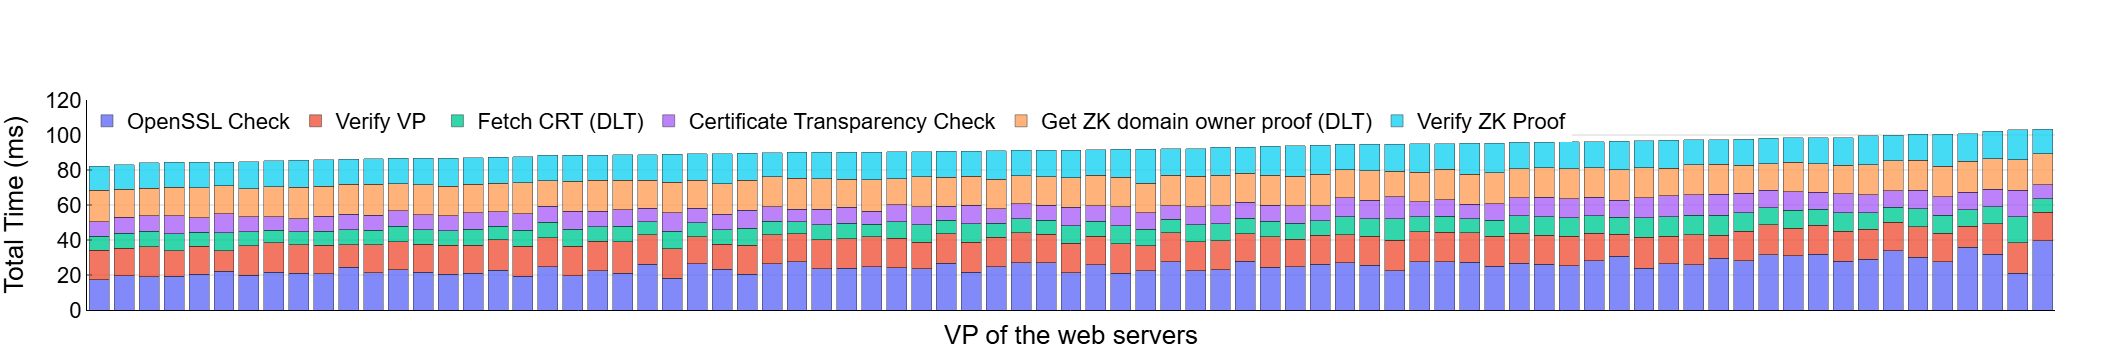

In [89]:
from scipy.stats import zscore

df = pd.read_csv("../perf2/ZK/P3-DPKI-local.csv")
df2 = pd.read_csv("../perf/P3-DPKI.csv")
df2 = df2[df2['Flag'] == 'OK']
dfOSSL=df2[['CommName','VerCRTTime']]
dfOSSL = dfOSSL.dropna()
dfOSSL = dfOSSL.groupby('CommName').mean()

#Only OK responses and numerical columns
df = df[df['Flag'] == 'OK']
df = df.drop(columns=['Flag', 'VerVPRes', 'VerCRTRes'])

#--------------------------Clean from outliers--------------------------
#z_scores = zscore(df['VerVPTime'])
#threshold = 4.5
#cleanedDF = df[(z_scores < threshold)]

cleanedDF = df.groupby('CommName').mean()

dfMerged=pd.merge(dfOSSL, cleanedDF, on="CommName")

dfSizeVP = dfMerged.sort_values(by='sizeVP')

dfSizeVP['total'] = dfSizeVP[['VerCRTTime','VerVPTime','getCRTtime','VerCTTime', 'getProof','verifyProof']].sum(axis=1)
print(dfSizeVP['total'].sum())
dfSizeVP = dfSizeVP.sort_values(by='total')
dfSizeVP.reset_index(inplace=True)
dfSizeVP.rename(columns={'index': 'index'}, inplace=True)

# Melt Dataframe
melted_df = dfSizeVP.melt(id_vars='CommName', value_vars=['VerCRTTime','VerVPTime','getCRTtime','VerCTTime', 'getProof','verifyProof'], 
                    var_name='Component', value_name='Value')


color_map = {
    'VerCRTTime': '#2f33a2',
    'VerVPTime': '#7fd3f2',
    'getCRTtime': '#8ae68a',
    'VerCTTime': '#f76d6d',   
    'getProof': '#ffb366',
    'verifyProof': '#f343f6'
}

fig = px.bar(melted_df, x='CommName', y='Value', color='Component',
             labels={'Value': 'Value', 'CommName': 'CommName', 'Component': 'Times'},
             barmode='stack', color_discrete_map=color_map)
fig.update_yaxes(range=[0, 120])

fig.update_layout(
    title_font=dict(size=22, family='Arial', color='black'),
    title_x=0.5,
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(title='VP of the web servers', linecolor='black', showgrid=False, showticklabels=False),
    yaxis=dict(title='Total Time (ms)', linecolor='black'),
    legend=dict(title='', bgcolor='white',
        orientation="h",     # horizontal
        x=0.0, y=1.0,        # top-left corner inside the plotting area
        xanchor="left", yanchor="top",
        borderwidth=0,
        font=dict(
        family="Arial",
        size=22,
        color="black"
    )
    )
)

fig.update_layout(
    font=dict(
        family="Arial",
        size=22,
        color="black"
    )
)

fig.update_yaxes(showgrid=True, gridcolor='lightgray',ticks="inside")
 

fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerCRTTime'),
                  overwrite=True,
                  name='OpenSSL Check', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerVPTime'),
                  overwrite=True,
                  name='Verify VP ', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='getCRTtime'),
                  overwrite=True,
                  name='Fetch CRT (DLT)', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerCTTime'),
                  overwrite=True,
                  name='Certificate Transparency Check', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='getProof'),
                  overwrite=True,
                  name='Get ZK domain owner proof (DLT)', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='verifyProof'),
                  overwrite=True,
                  name='Verify ZK Proof', opacity=0.8)

fig.show()
fig.write_image("zkVerificationTime.png", width=2000, height=600, scale=3)



5276.364500000001


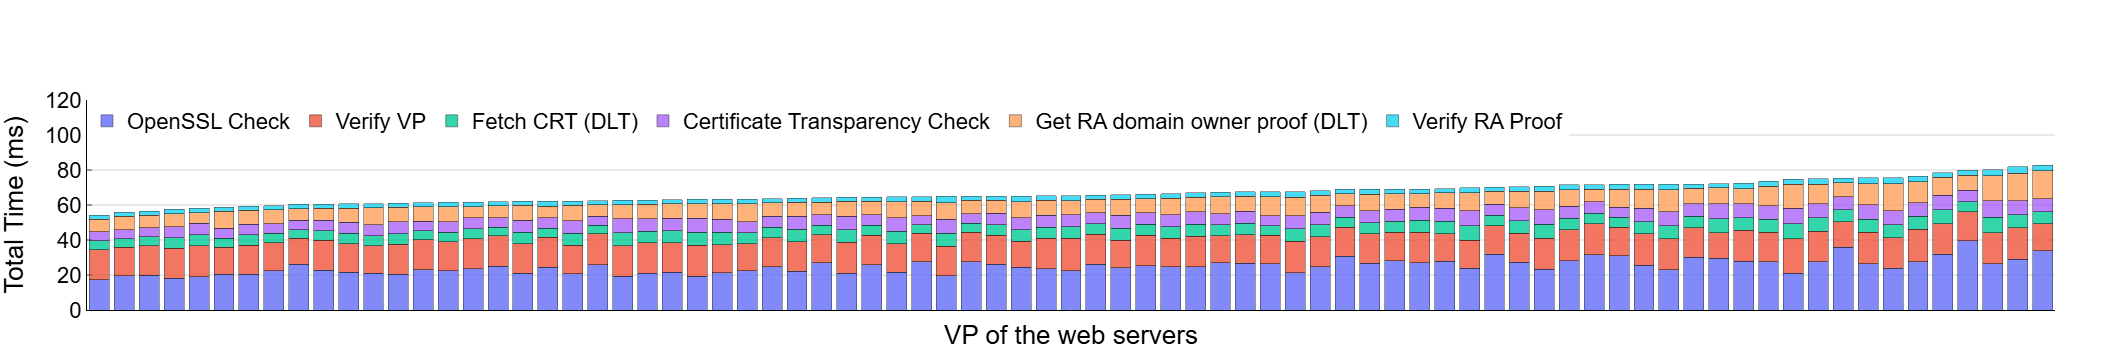

In [90]:
from scipy.stats import zscore

df = pd.read_csv("../perf2/RA/P3-DPKI-RA.csv")
df2 = pd.read_csv("../perf/P3-DPKI.csv")
df2 = df2[df2['Flag'] == 'OK']
dfOSSL=df2[['CommName','VerCRTTime']]
dfOSSL = dfOSSL.dropna()
dfOSSL = dfOSSL.groupby('CommName').mean()

#Only OK responses and numerical columns
df = df[df['Flag'] == 'OK']
df = df.drop(columns=['Flag', 'VerVPRes', 'VerCRTRes'])

#--------------------------Clean from outliers--------------------------
#z_scores = zscore(df['VerVPTime'])
#threshold = 4.5
#cleanedDF = df[(z_scores < threshold)]

cleanedDF = df.groupby('CommName').mean()

dfMerged=pd.merge(dfOSSL, cleanedDF, on="CommName")

dfSizeVP = dfMerged.sort_values(by='sizeVP')
dfSizeVP['total'] = dfSizeVP[['VerCRTTime','VerVPTime','getCRTtime','VerCTTime', 'getProof','verifyProof']].sum(axis=1)
print(dfSizeVP['total'].sum())
dfSizeVP = dfSizeVP.sort_values(by='total')
dfSizeVP.reset_index(inplace=True)
dfSizeVP.rename(columns={'index': 'index'}, inplace=True)

# Melt Dataframe
melted_df = dfSizeVP.melt(id_vars='CommName', value_vars=['VerCRTTime','VerVPTime','getCRTtime','VerCTTime', 'getProof','verifyProof'], 
                    var_name='Component', value_name='Value')


color_map = {
    'VerCRTTime': '#2f33a2',
    'VerVPTime': '#7fd3f2',
    'getCRTtime': '#8ae68a',
    'VerCTTime': '#f76d6d',   
    'getProof': '#ffb366',
    'verifyProof': '#f343f6'
}

fig = px.bar(melted_df, x='CommName', y='Value', color='Component',
             labels={'Value': 'Value', 'CommName': 'CommName', 'Component': 'Times'},
             barmode='stack', color_discrete_map=color_map)
fig.update_yaxes(range=[0, 120])

fig.update_layout(
    title_font=dict(size=22, family='Arial', color='black'),
    title_x=0.5,
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(title='VP of the web servers', linecolor='black', showgrid=False, showticklabels=False),
    yaxis=dict(title='Total Time (ms)', linecolor='black'),
    legend=dict(title='', bgcolor='white',
        orientation="h",     # horizontal
        x=0.0, y=1.0,        # top-left corner inside the plotting area
        xanchor="left", yanchor="top",
        borderwidth=0,
        font=dict(
        family="Arial",
        size=22,
        color="black"
    )
    )
)

fig.update_layout(
    font=dict(
        family="Arial",
        size=22,
        color="black"
    )
)

fig.update_yaxes(showgrid=True, gridcolor='lightgray',ticks="inside")

fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerCRTTime'),
                  overwrite=True,
                  name='OpenSSL Check', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerVPTime'),
                  overwrite=True,
                  name='Verify VP', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='getCRTtime'),
                  overwrite=True,
                  name='Fetch CRT (DLT)', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='VerCTTime'),
                  overwrite=True,
                  name='Certificate Transparency Check', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='getProof'),
                  overwrite=True,
                  name='Get RA domain owner proof (DLT)', opacity=0.8)
fig.update_traces(marker=dict(line=dict(color='black', width=0.5)),
                  selector=dict(name='verifyProof'),
                  overwrite=True,
                  name='Verify RA Proof', opacity=0.8)

fig.show()
fig.write_image("raVerificationTime.png", width=2000, height=600, scale=3)



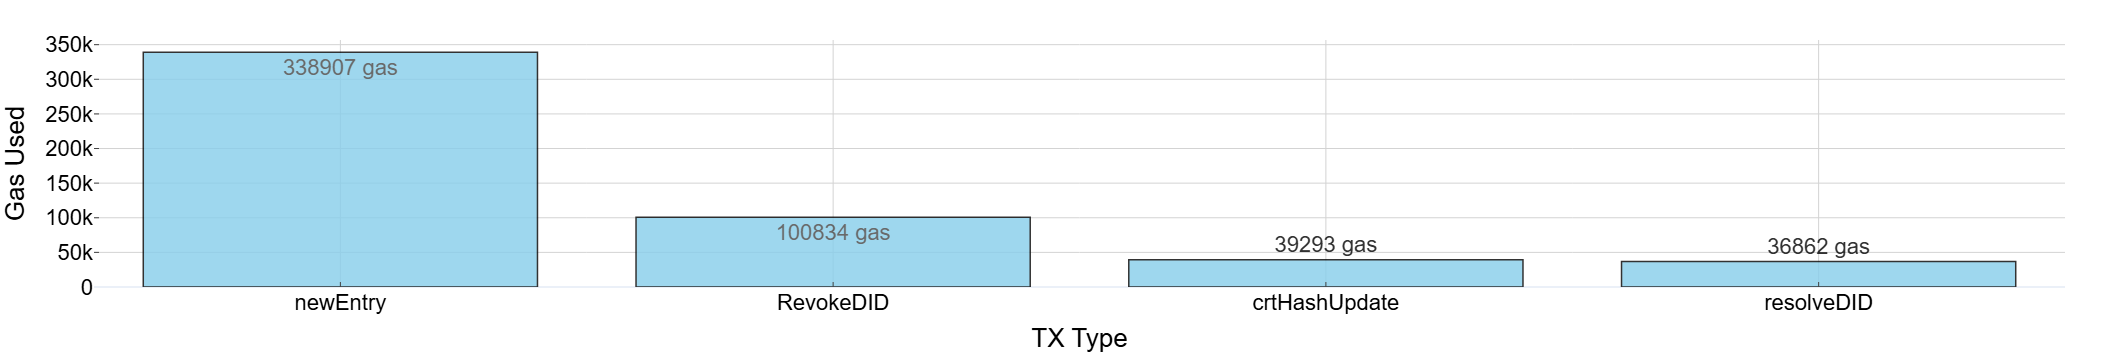

In [68]:
#-------------------------PLOT DATA----------------------------------------

actualPriceETH = 3654 #Ethereum Avg Price in March 2024

data = {
    "Transaction": ["newEntry", "RevokeDID", "crtHashUpdate", "resolveDID"],
    "Used Gas": [338907, 100834, 39293, 36862],
}
df = pd.DataFrame(data)

# Plot gas used
custom_text3 = [f"{gas:.0f} gas" for gas in df["Used Gas"]]
fig3 = px.bar(df, x="Transaction", y="Used Gas", text=custom_text3)
fig3.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5, opacity=0.8)
fig3.update_xaxes(title='TX Type', showgrid=True, gridcolor='lightgray',ticks="inside")
fig3.update_yaxes(title='Gas Used', showgrid=True, gridcolor='lightgray',ticks="inside")

fig3.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=16,
    margin=dict(l=40, r=40, t=40, b=40),
    template="plotly_white" # Clean background
)
fig3.show()
fig3.write_image("gas_used.png", width=1000, height=600, scale=3)




     Time     Gas  Time.1
0  104.04  340786  104.04


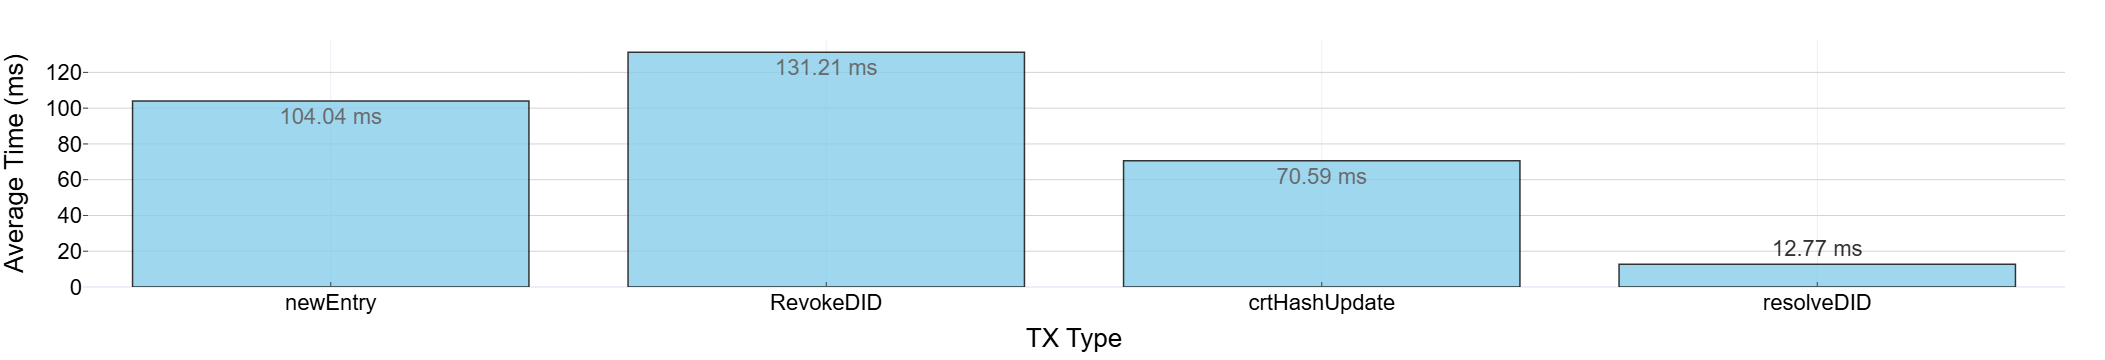

In [73]:
df1 = pd.read_csv("../perf2/ZK/TX-newEntry-Local.csv")
df2 = pd.read_csv("../perf2/ZK/TX-updEntry-Local.csv")
df3 = pd.read_csv("../perf2/ZK/TX-resolve-Local.csv")
df4 = pd.read_csv("../perf2/ZK/TX-infoCT-Local.csv")

df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

#--------------------------------------------NEW_ENTRY TRANSACTION---------------------------------------
print(df1)
averageTimeNewEntryTX = df1.iloc[:, 0].mean()
averageCostNewEntryTX = df1.iloc[:, 1].mean()

#-------------------------------------------UPD TRANSACTIONS----------------------------------------------
df2 = df2.groupby('TX-TYPE').mean()
averageTimeCrtUpdtTX = df2.iloc[0,0]
averageTimeRAUpdtTX = df2.iloc[1,0]
averageCostCrtUpdtTX = df2.iloc[0,1]
averageCostRAUpdtTX = df2.iloc[1,1]

#------------------------------------------DID_RESOLUTION TRANSACTION-----------------------------------------
averageTimeResolutionTX = df3.iloc[:, 0].mean()

#-----------------------------------------REVOKE_DID TRANSACTION----------------------------------------------
averageTimeRevokeDIDTX = (125.53 + 157.24 + 135.52 + 117.41 + 120.37)/5
averageCostRevokeDIDTX = (0.00011257051110336 + 0.000108527000882811 + 0.0001178265455172480 + 0.00010545527430528 + 0.000103089374621376)/5


#---------------------------------------------INFO_CT TRANSACTION-----------------------------------------------
averageTimeInfoCTTX = df4.iloc[:,0].mean()

#-------------------------PLOT DATA----------------------------------------

actualPriceETH = 3000 #Ethereum Avg Price in March 2024

data = {
    "Transaction": ["newEntry", "RevokeDID", "crtHashUpdate" , "resolveDID"],
    "Average Validation Time (ms)": [round(averageTimeNewEntryTX, 2),  averageTimeRevokeDIDTX, round(averageTimeCrtUpdtTX, 2), round(averageTimeResolutionTX, 2)],
    "Average Cost (USD)": [averageCostNewEntryTX * actualPriceETH, averageCostRevokeDIDTX*actualPriceETH, averageCostCrtUpdtTX * actualPriceETH, 0],
}
df = pd.DataFrame(data)

# Plot times
custom_text1 = [f"{time:.2f} ms" for time in df["Average Validation Time (ms)"]]
fig1 = px.bar(df, x="Transaction", y="Average Validation Time (ms)", text=custom_text1,)
fig1.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5, opacity=0.8)
fig1.update_xaxes(title='TX Type', showgrid=True,ticks="inside")
fig1.update_yaxes(title='Average Time (ms)', showgrid=True, gridcolor='lightgray',ticks="inside")

fig1.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=16,
    margin=dict(l=40, r=40, t=40, b=40),
    template="plotly_white" # Clean background
)
fig1.show()
fig1.write_image("receipt_time_gana.png", width=1000, height=600, scale=3)



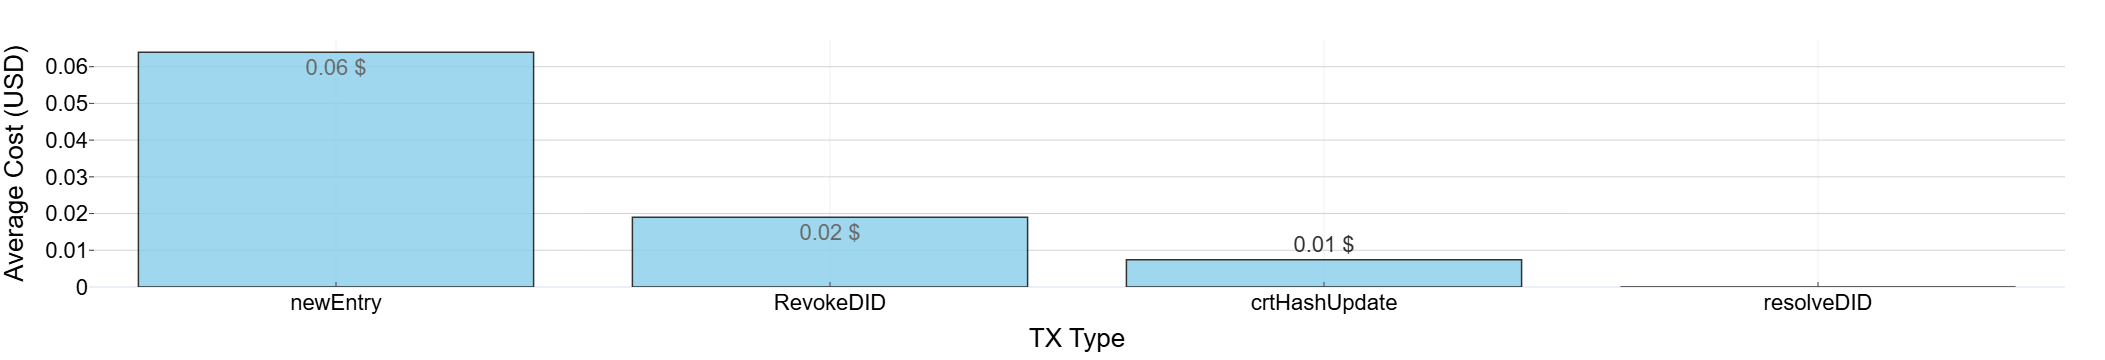

In [75]:
df1 = pd.read_csv("../perf2/ZK/TX-newEntry-Local.csv")
df2 = pd.read_csv("../perf2/ZK/TX-updEntry-Local.csv")
df3 = pd.read_csv("../perf2/ZK/TX-resolve-Local.csv")
df4 = pd.read_csv("../perf2/ZK/TX-infoCT-Local.csv")

df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

#--------------------------------------------NEW_ENTRY TRANSACTION---------------------------------------
averageTimeNewEntryTX = df1.iloc[:, 0].mean()
averageCostNewEntryTX = df1.iloc[:, 1].mean()

#-------------------------------------------UPD TRANSACTIONS----------------------------------------------
df2 = df2.groupby('TX-TYPE').mean()
averageTimeCrtUpdtTX = df2.iloc[0,0]
averageTimeRAUpdtTX = df2.iloc[1,0]
averageCostCrtUpdtTX = df2.iloc[0,1]
averageCostRAUpdtTX = df2.iloc[1,1]

#------------------------------------------DID_RESOLUTION TRANSACTION-----------------------------------------
averageTimeResolutionTX = df3.iloc[:, 0].mean()

#-----------------------------------------REVOKE_DID TRANSACTION----------------------------------------------
averageTimeRevokeDIDTX = (125.53 + 157.24 + 135.52 + 117.41 + 120.37)/5
averageCostRevokeDIDTX = 100834


#---------------------------------------------INFO_CT TRANSACTION-----------------------------------------------
averageTimeInfoCTTX = df4.iloc[:,0].mean()

#-------------------------PLOT DATA----------------------------------------

gasprice=0.063
actualPriceETH = (0.063*2993)/1000000000 #Ethereum Avg Price in March 2024

data = {
    "Transaction": ["newEntry", "RevokeDID", "crtHashUpdate", "resolveDID"],
    "Average Validation Time (ms)": [round(averageTimeNewEntryTX, 2),  averageTimeRevokeDIDTX, round(averageTimeCrtUpdtTX, 2), round(averageTimeResolutionTX, 2)],
    "Average Cost (USD)": [338907 * actualPriceETH, 100834*actualPriceETH,  39293* actualPriceETH, 0],
}
df = pd.DataFrame(data)


# Plot costs
custom_text2 = [f"{cost:.2f} $" for cost in df["Average Cost (USD)"]]
fig2 = px.bar(df, x="Transaction", y="Average Cost (USD)",  text=custom_text2)
fig2.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5, opacity=0.8) 
fig2.update_xaxes(title='TX Type', showgrid=True,ticks="inside")
fig2.update_yaxes(title='Average Cost (USD)', showgrid=True, gridcolor='lightgray',ticks="inside")

fig2.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=16,
    margin=dict(l=40, r=40, t=40, b=40),
    template="plotly_white" # Clean background
)
fig2.show()
fig2.write_image("receipt_cost_gana.png", width=1000, height=600, scale=3)



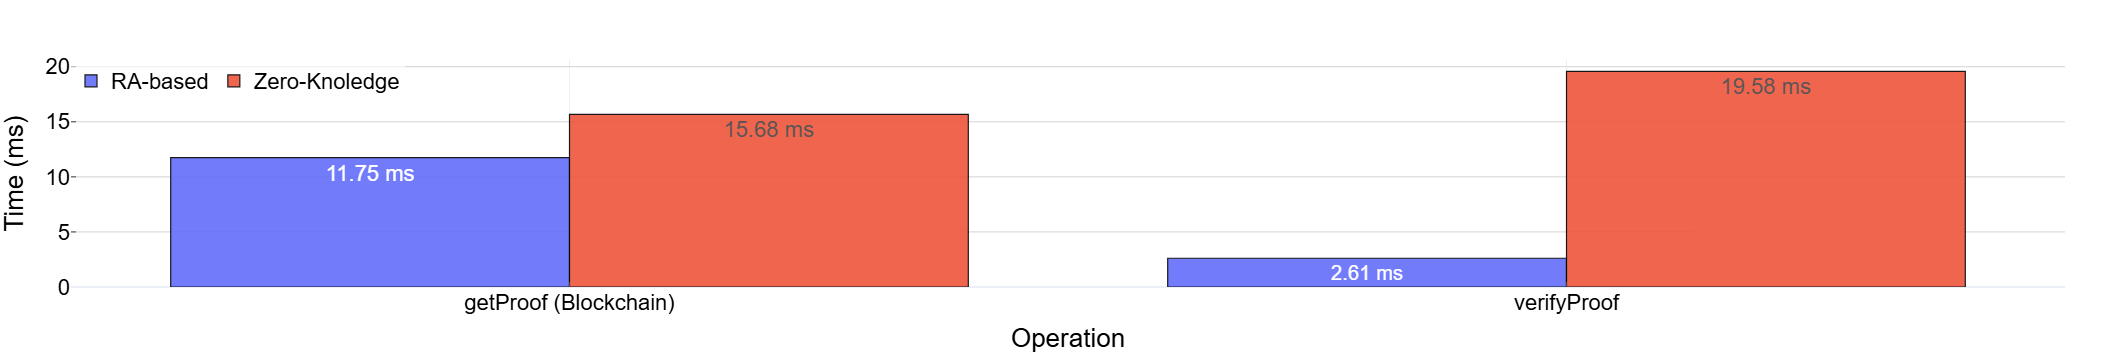

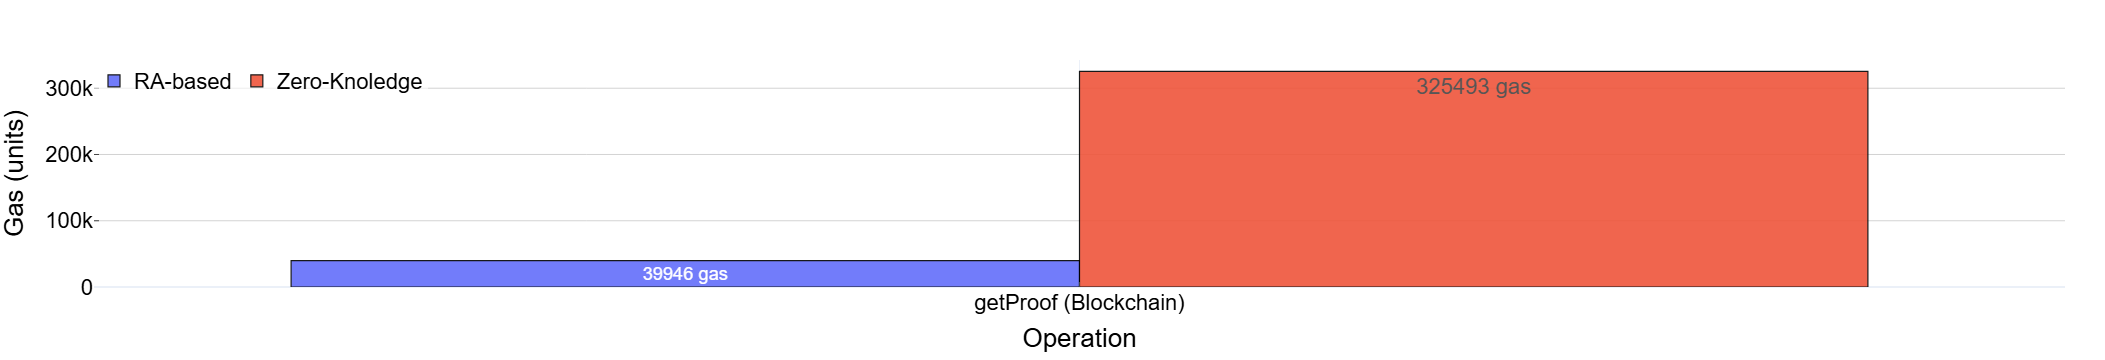

In [34]:

import pandas as pd
import plotly.express as px

# ---- Data (from your corrected interpretation) ----
data = [
    {"Approach": "RA-based", "Operation": "getProof (Blockchain)", "Time_ms": 11.75, "Gas": 39946},
    {"Approach": "RA-based", "Operation": "verifyProof",            "Time_ms": 2.61,  "Gas": None},
    {"Approach": "Zero-Knoledge", "Operation": "getProof (Blockchain)", "Time_ms": 15.68, "Gas": 325493},
    {"Approach": "Zero-Knoledge", "Operation": "verifyProof",            "Time_ms": 19.58, "Gas": None},
]
df = pd.DataFrame(data)

# ---- 1) Execution Time Plot (legend shows RA vs ZK) ----
fig_time = px.bar(
    df,
    x="Operation",
    y="Time_ms",
    color="Approach",  # This creates the RA/ZK legend
    barmode="group",   # Bars side-by-side per operation
    text=df["Time_ms"].round(2).astype(str) + " ms",
    labels={"Operation": "Operation", "Time_ms": "Time (ms)"},
)

# Styling
fig_time.update_traces(
    marker_line_color="black",
    marker_line_width=1.2,
    opacity=0.90,
    textposition="inside"
)
fig_time.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=20,
    margin=dict(l=40, r=40, t=60, b=40),
    template="plotly_white",
    legend=dict(
        orientation="h",     # horizontal
        x=0.0, y=1.0,        # top-left corner inside the plotting area
        xanchor="left", yanchor="top",
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=0
    ),
    legend_title_text=""
)

fig_time.update_xaxes(title="Operation", showgrid=True, ticks="inside")
fig_time.update_yaxes(title="Time (ms)", showgrid=True, gridcolor="lightgray", ticks="inside")

fig_time.show()

# (Optional) Save as image (requires 'kaleido')
fig_time.write_image("time_ra_zk_plotly.png", width=1000, height=600, scale=3)


# ---- 2) Gas Usage Plot (only blockchain steps) ----
df_gas = df.dropna(subset=["Gas"]).copy()

fig_gas = px.bar(
    df_gas,
    x="Operation",
    y="Gas",
    color="Approach",  # Color by RA/ZK for clarity
    barmode="group",
    text=[f"{gas:.0f} gas" for gas in df_gas["Gas"]],
    labels={"Operation": "Operation", "Gas": "Gas (units)"},
)

# Styling
fig_gas.update_traces(
    marker_line_color="black",
    marker_line_width=1.2,
    opacity=0.90,
    textposition="inside"
)
fig_gas.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=20,
    margin=dict(l=40, r=40, t=60, b=40),
    template="plotly_white",
    legend=dict(
        orientation="h",     # horizontal
        x=0.0, y=1.0,        # top-left corner inside the plotting area
        xanchor="left", yanchor="top",
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=0
    ),
    legend_title_text=""
)
fig_gas.update_xaxes(title="Operation", showgrid=True, ticks="inside")
fig_gas.update_yaxes(title="Gas (units)", showgrid=True, gridcolor="lightgray", ticks="inside")

fig_gas.show()

# (Optional) Save as image (requires 'kaleido')
fig_gas.write_image("gas_ra_zk_plotly.png", width=1000, height=600, scale=3)


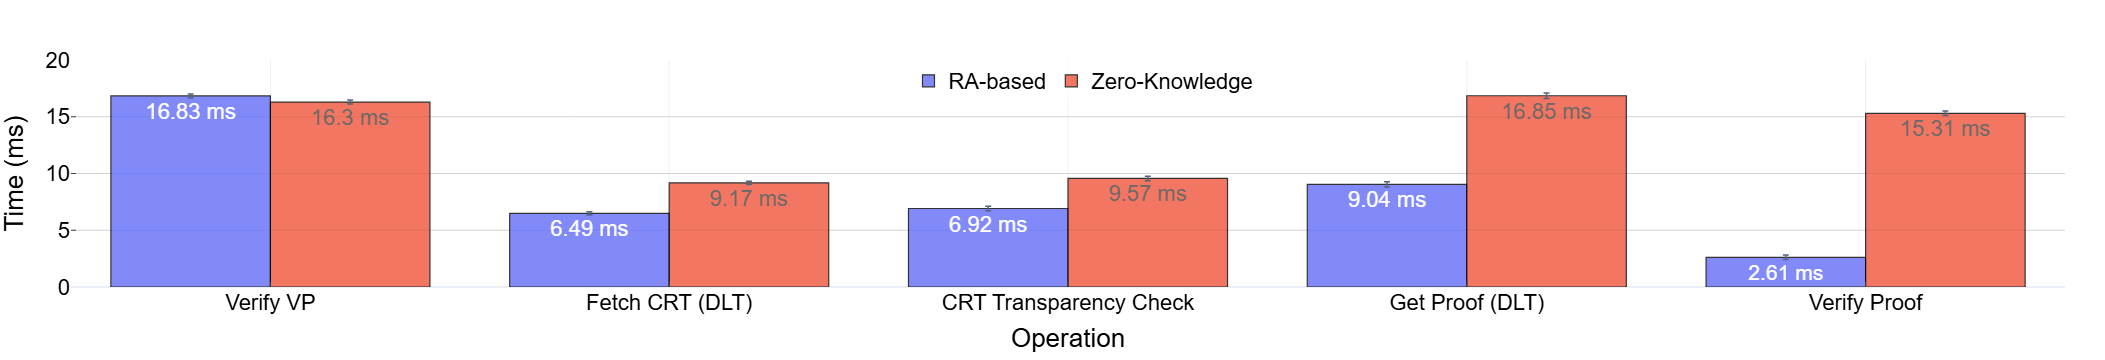

In [91]:

import pandas as pd
import plotly.express as px

# ---------- Load data ----------
df_local = pd.read_csv("../perf2/ZK/P3-DPKI-local.csv")
df_ra    = pd.read_csv("../perf2/RA/P3-DPKI-RA.csv")

df_local["Approach"] = "Zero-Knowledge"
df_ra["Approach"]    = "RA-based"

cols = ["VerVPTime", "getCRTtime", "VerCTTime", "getProof", "verifyProof"]
df_all = pd.concat([df_local, df_ra], ignore_index=True)

# ---------- Aggregation: mean, std, count ----------
stats = (
    df_all.groupby("Approach")[cols]
          .agg(["mean", "std", "count"])
)

# Flatten MultiIndex columns
stats.columns = [f"{op}_{stat}" for op, stat in stats.columns]
stats = stats.reset_index()

# Long format with mean, std, count
long_rows = []
for _, row in stats.iterrows():
    for op in cols:
        long_rows.append({
            "Approach": row["Approach"],
            "Operation": op,
            "Mean_ms": row[f"{op}_mean"],
            "Std_ms": row[f"{op}_std"],
            "N": int(row[f"{op}_count"])
        })
agg = pd.DataFrame(long_rows)

# Order operations (optional)

op_order = ["VerVPTime", "getCRTtime", "VerCTTime", "getProof", "verifyProof"]


op_rename = {
    "VerVPTime":   "Verify VP",
    "getCRTtime":  "Fetch CRT (DLT)",
    "VerCTTime":   "CRT Transparency Check",
    "getProof":    "Get Proof (DLT)",
    "verifyProof": "Verify Proof"
}

# Applica rinomina solo alle etichette
agg["Operation"] = agg["Operation"].map(op_rename)

# Ordine desiderato (usa le nuove etichette)
op_order = [op_rename[o] for o in ["VerVPTime", "getCRTtime", "VerCTTime", "getProof", "verifyProof"]]


agg["Operation"] = pd.Categorical(agg["Operation"], categories=op_order, ordered=True)
agg = agg.sort_values(["Operation", "Approach"])

# ---------- Choose interval type ----------
USE_CONFIDENCE_INTERVAL = True  # set False to use standard deviation bars

if USE_CONFIDENCE_INTERVAL:
    agg["SE_ms"] = agg["Std_ms"] / agg["N"].pow(0.5)
    agg["Err_ms"] = 1.96 * agg["SE_ms"]  # 95% CI (Mean ± Err_ms)
    error_col = "Err_ms"
    interval_label = "±95% CI"
else:
    agg["Err_ms"] = agg["Std_ms"]         # Std deviation bars
    error_col = "Err_ms"
    interval_label = "±1σ (std dev)"

# ---------- Plot: Grouped bar with error bars ----------

fig_time = px.bar(
    agg,
    x="Operation",
    y="Mean_ms",
    color="Approach",
    barmode="group",
    text=agg["Mean_ms"].round(2).astype(str) + " ms",
    labels={"Operation": "Operation", "Mean_ms": f"Time (ms) {interval_label}"},
)

# Add error bars
fig_time.update_traces(
    error_y=dict(
        type="data",
        array=agg[error_col],
        visible=True,
        thickness=1.5,
        width=3
    ),
    marker_line_color="black",
    marker_line_width=1.2,
    opacity=0.80,
    textposition="inside"
)

fig_time.update_yaxes(range=[0, 20])

# Styling (same look & feel)
fig_time.update_layout(
    font_family="Arial",
    font_size=22,
    font_color="black",
    title_font_size=20,
    margin=dict(l=40, r=40, t=60, b=40),
    template="plotly_white",
    legend=dict(
        orientation="h",
        x=0.420, y=1.0,
        xanchor="left", yanchor="top",
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=0
    ),
    legend_title_text=""
)
fig_time.update_xaxes(title="Operation", showgrid=True, ticks="inside",ticktext=['January', 'February','dasd','dada','dsada'])
fig_time.update_yaxes(title=f"Time (ms)", showgrid=True, gridcolor="lightgray", ticks="inside")

fig_time.show()

fig_time.write_image("compareVerificationTime.png", width=2000, height=600, scale=3)
